In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from IPython.display import Image
import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_pickle(r"C:\Users\Sunayana chittari\project\data_new_1500.pkl")
#data.drop('weights',inplace=True,axis=1)
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,wm_yr_wk,wday,...,sold_lag_35,sold_lag_42,sold_lag_49,sold_lag_56,item_sold_avg,avg_sold_storewis,avg_sold_statewis,avg_sold_catwis,avg_sold_store_item,avg_sold_state_item
45735000,14370,1437,3,1,0,0,1501,0,11506,3,...,0.0,1.0,1.0,2.0,0.216553,1.304688,1.21582,0.561035,0.321533,0.335938
45735001,14380,1438,3,1,0,0,1501,1,11506,3,...,0.0,0.0,0.0,2.0,0.259766,1.304688,1.21582,0.561035,0.253906,0.204346
45735002,14390,1439,3,1,0,0,1501,0,11506,3,...,0.0,1.0,0.0,1.0,0.076660,1.304688,1.21582,0.561035,0.156982,0.098938
45735003,14400,1440,3,1,0,0,1501,1,11506,3,...,0.0,3.0,8.0,2.0,2.011719,1.304688,1.21582,0.561035,1.694336,2.935547
45735004,14410,1441,3,1,0,0,1501,1,11506,3,...,1.0,0.0,1.0,0.0,0.755371,1.304688,1.21582,0.561035,0.958984,0.968750


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299810 entries, 45735000 to 60034809
Data columns (total 34 columns):
id                     int16
item_id                int16
dept_id                int8
cat_id                 int8
store_id               int8
state_id               int8
d                      int16
sales                  int16
wm_yr_wk               int16
wday                   int8
month                  int8
year                   int16
event_name_1           int8
event_type_1           int8
event_name_2           int8
event_type_2           int8
snap_CA                int8
snap_TX                int8
snap_WI                int8
holiday                int8
if_weekend             int8
sell_price             float16
sold_lag_28            float16
sold_lag_30            float16
sold_lag_35            float16
sold_lag_42            float16
sold_lag_49            float16
sold_lag_56            float16
item_sold_avg          float16
avg_sold_storewis      float16
avg_s

# splitting

In [3]:


def split_data(data):

    #Product details upto day 1913 is used as training dataset
    X_train = data[data['d']<=1913]
    y_train = X_train['sales']
    X_train.drop('sales',axis = 1,inplace = True)
    
    # Product details from day 1914 to 1941 is used as validation dataset
    X_val = data[(data['d']>=1914) & (data['d']<=1941)]
    y_val = X_val['sales']
    X_val.drop(['sales'],axis = 1,inplace = True)
    
    # Product details starting from day 1942 is used as validation dataset
    X_test = data[(data['d']>=1942)]
    X_test.drop(['sales'],axis = 1,inplace = True)
    
    #print("Train dataset",X_train.shape,y_train.shape)
    #print("Validation dataset",X_val.shape,y_val.shape)
    #print("Test dataset",X_test.shape)
    return(X_train,y_train,X_val,y_val,X_test)

In [4]:
def reshape(input):
    value = np.reshape(input, (-1, 28),order = 'F')
    return value

In [5]:
from tqdm import tqdm

In [6]:
def submission_term(val_predict,test_predict):
        
    val_pred =reshape(val_predict)
    test_pred=reshape(test_predict)
    
    submission=pd.read_csv(r"C:\Users\Sunayana chittari\project\sample_submission.csv")
    
    for ind in tqdm(range(28)):
        submission.iloc[:30490,ind+1]=val_pred[:,ind]
        submission.iloc[30490:,ind+1]=test_pred[:,ind]
        
    return submission

# linear_regression

In [7]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

In [9]:
xtrain,ytrain,xval,yval,xtest=split_data(data)

model = LinearRegression(n_jobs=-1)
model.fit(xtrain,ytrain)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [10]:
yval_pred  = model.predict(xval)
ytest_pred = model.predict(xtest)


In [11]:
rmse = mse(yval,yval_pred)

print(rmse)

submission1=submission_term(yval_pred,ytest_pred)
submission1.to_csv(r"C:\Users\Sunayana chittari\project\submissions\linreg\sample_submission_new.csv",index=False)
submission1.head()

5.0195494


100%|█████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 104.20it/s]


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0.496094,0.671143,0.593506,0.403076,0.785645,0.473877,0.994629,0.460205,1.229004,...,0.750000,1.269043,1.164307,0.735596,0.796631,0.742432,1.072266,0.487061,1.237549,0.856689
1,HOBBIES_1_002_CA_1_validation,0.453369,0.236816,0.243896,0.420898,0.281250,0.461914,0.621338,0.456055,0.315674,...,0.351318,0.540039,0.576416,0.262451,0.200439,0.361816,0.291748,0.375000,0.475342,0.482666
2,HOBBIES_1_003_CA_1_validation,0.257568,0.258301,0.126465,0.133789,0.308594,0.883545,0.704590,0.315430,0.504883,...,0.772217,0.805664,0.995605,0.382568,0.466064,0.496094,0.516846,0.687012,0.687988,0.863037
3,HOBBIES_1_004_CA_1_validation,2.088379,1.452393,1.200684,1.621338,1.586182,1.993896,2.837891,1.891113,1.743408,...,2.044434,2.273682,3.050781,2.052979,1.685059,1.776123,1.497070,1.796387,3.097412,2.982422
4,HOBBIES_1_005_CA_1_validation,1.172852,1.063965,1.489014,1.105469,1.213623,1.348877,1.582031,1.198486,1.440186,...,1.211182,1.336426,1.655029,1.004395,1.043945,1.129150,1.358398,1.118164,1.409668,1.934326


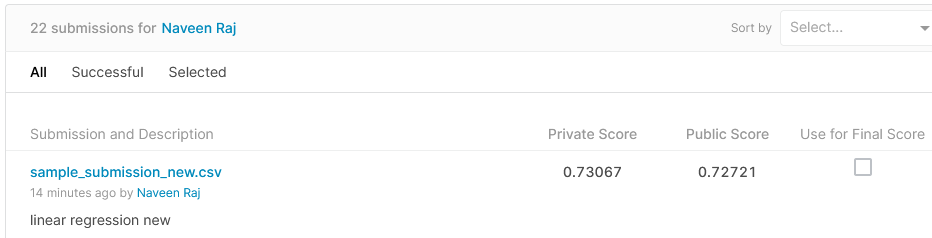

In [58]:
from IPython import display
display.Image(r"C:\Users\Sunayana chittari\project\submissions\linreg\final_sample.png")

# ridge

In [12]:
from sklearn import linear_model

In [19]:
model2=linear_model.Ridge()
model2.fit(xtrain,ytrain)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
yval_pred  = model2.predict(xval)
ytest_pred = model2.predict(xtest)


In [16]:
rmse = mse(yval,yval_pred)

print(rmse)
submission2=submission_term(yval_pred,ytest_pred)
submission2.to_csv(r"C:\Users\Sunayana chittari\project\submissions\ridge\sample_submission_new.csv",index=False)
submission2.head()

5.019669367168964


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 77.81it/s]


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0.494518,0.671327,0.593324,0.402800,0.786206,0.472363,0.991283,0.457676,1.223824,...,0.750879,1.265977,1.163096,0.734401,0.794726,0.741593,1.069868,0.487820,1.236234,0.854083
1,HOBBIES_1_002_CA_1_validation,0.452018,0.235847,0.243321,0.421506,0.281687,0.461104,0.619521,0.454303,0.312711,...,0.351633,0.538108,0.573775,0.261585,0.199356,0.360771,0.291893,0.375617,0.473573,0.481046
2,HOBBIES_1_003_CA_1_validation,0.256852,0.257779,0.125846,0.133320,0.308891,0.885420,0.702273,0.313410,0.502917,...,0.772133,0.803326,0.991661,0.380850,0.464573,0.495466,0.517095,0.687672,0.685959,0.861465
3,HOBBIES_1_004_CA_1_validation,2.087933,1.451709,1.199746,1.621004,1.582799,1.993077,2.837934,1.888070,1.738296,...,2.044846,2.273816,3.046613,2.051016,1.682663,1.777275,1.497685,1.794478,3.092453,2.982335
4,HOBBIES_1_005_CA_1_validation,1.171926,1.064585,1.487150,1.102983,1.214083,1.347494,1.577261,1.197077,1.436903,...,1.211505,1.334545,1.651748,1.005023,1.043417,1.129512,1.358017,1.117919,1.406837,1.931304


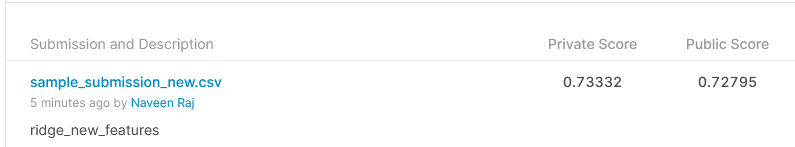

In [1]:
from IPython import display
display.Image(r"C:\Users\Sunayana chittari\project\submissions\ridge\best_all_feat.png")

# lgbm

In [8]:
from lightgbm import LGBMRegressor

In [46]:
for i in range(15):
    lr = np.round(np.random.rand()/10,3)
    num_leaves = np.random.randint(30,150)
    min_data_in_leaf = np.random.randint(50,150)

    lgb = LGBMRegressor( learning_rate=lr ,
                            num_leaves=num_leaves ,
                            min_data_in_leaf=min_data_in_leaf)

    lgb.fit(xtrain, ytrain)

    # After training the model, we are trying to predict the model on X_val to check it's accuracy
    y_pred = lgb.predict(xval)

    # Now that it has predicted the values for X_val, we are calculating it's rmse
    rmse = mse(yval,y_pred)
    
    print(f"For learning rate {lr}, num_leaves {num_leaves} and min_data_in_leaf {min_data_in_leaf} the RMSE is {rmse} ")
    print('*'*80)

[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
For learning rate 0.09, num_leaves 59 and min_data_in_leaf 87 the RMSE is 4.7726068477315975 
********************************************************************************
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
For learning rate 0.019, num_leaves 38 and min_data_in_leaf 67 the RMSE is 5.348023576199353 
********************************************************************************
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
For learning rate 0.04, num_leaves 59 and min_data_in_leaf 90 the RMSE is 4.878692283478705 
********************************************************************************
[LightGBM] [Warning] min_data_in_leaf is set=129, min_child_samples=20 will be ignored. Current value: min_dat

In [50]:
#best parameter:
min_data_in_leaf=114
lr =0.089
num_leaves= 146 

best_lgb = LGBMRegressor( learning_rate=lr ,num_leaves=num_leaves ,min_data_in_leaf=min_data_in_leaf)
best_lgb.fit(xtrain,ytrain)

yval_pred  = best_lgb.predict(xval)
ytest_pred = best_lgb.predict(xtest)

rmse = mse(yval,yval_pred)
print(rmse)

[LightGBM] [Warning] min_data_in_leaf is set=114, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=114
4.7204476307580086


In [51]:
submission3=submission_term(yval_pred,ytest_pred)
submission3.to_csv(r"C:\Users\Sunayana chittari\project\submissions\lgbm\best_sample_submission.csv",index=False)
submission3.head()

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 79.21it/s]


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0.519676,0.578004,0.545937,0.419725,0.766531,0.482346,0.764459,0.399347,0.798360,...,0.568665,0.836571,0.849162,0.597367,0.685536,0.608293,0.818508,0.469826,1.001998,0.726085
1,HOBBIES_1_002_CA_1_validation,0.458576,0.305481,0.305481,0.344159,0.308530,0.415654,0.398394,0.325494,0.224830,...,0.291193,0.355490,0.351997,0.276852,0.222767,0.327758,0.271369,0.377328,0.337982,0.337982
2,HOBBIES_1_003_CA_1_validation,0.298295,0.258039,0.173137,0.180756,0.319606,0.641809,0.433050,0.238480,0.337012,...,0.466842,0.526071,0.636670,0.323761,0.352848,0.350725,0.387551,0.497995,0.441076,0.614643
3,HOBBIES_1_004_CA_1_validation,2.202728,1.472858,1.272931,1.637233,1.975743,2.040314,2.748595,1.878772,1.673739,...,2.026077,2.174503,3.292013,1.837690,1.644207,1.773557,1.324699,1.823610,3.077820,3.075141
4,HOBBIES_1_005_CA_1_validation,1.090597,1.084850,1.246273,1.154269,1.448286,1.392414,1.584874,1.080972,1.312224,...,1.146513,1.251426,1.534643,0.959786,0.939590,0.895631,1.156721,1.039035,1.347209,1.898366


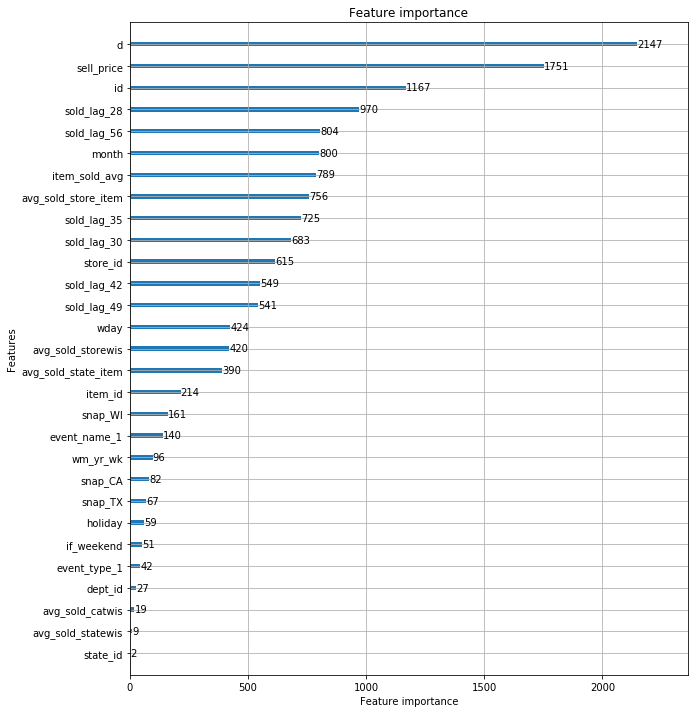

In [57]:
import lightgbm as lgb
lgb.plot_importance(best_lgb, figsize=(10, 12))

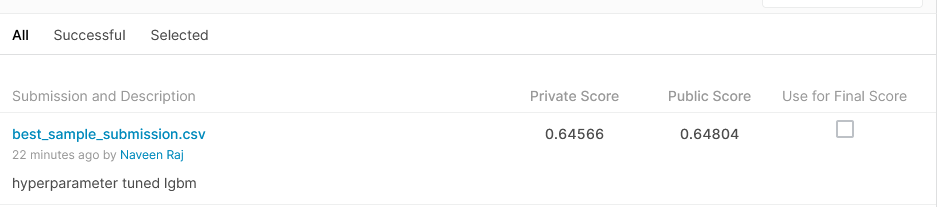

In [54]:
from IPython import display
display.Image(r"C:\Users\Sunayana chittari\project\submissions\lgbm\best_result.png")

# XGboost

In [13]:
import xgboost as xg

In [11]:
xtrain,ytrain,xval,yval,xtest=split_data(data)

In [16]:
xgb = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10,n_jobs=-1)

In [17]:
xgb.fit(xtrain,ytrain)

[14:12:32] WARNING: d:\bld\xgboost-split_1619725139497\work\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=10, n_jobs=-1, num_parallel_tree=1,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, subsample=1, tree_method='approx',
       validate_parameters=1, verbosity=None)

In [18]:
yval_pred  = xgb.predict(xval)
ytest_pred = xgb.predict(xtest)

rmse = mse(yval,yval_pred)
print(rmse)

5.059945


In [19]:
submission3=submission_term(yval_pred,ytest_pred)
submission3.to_csv(r"C:\Users\Sunayana chittari\project\submissions\xgb\best_sample_submission.csv",index=False)
submission3.head()

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 57.80it/s]


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0.563863,0.716251,0.577405,0.483140,0.767875,0.524490,0.713210,0.509152,0.853273,...,0.549076,0.755434,0.843940,0.626525,0.665864,0.641912,0.800974,0.546307,0.946257,0.534550
1,HOBBIES_1_002_CA_1_validation,0.513613,0.337904,0.337904,0.355270,0.295742,0.311081,0.350102,0.334764,0.250981,...,0.306797,0.301629,0.301629,0.306797,0.250981,0.370875,0.290002,0.376925,0.305341,0.305341
2,HOBBIES_1_003_CA_1_validation,0.312536,0.248399,0.192583,0.192583,0.334588,0.565675,0.402146,0.231604,0.460960,...,0.488496,0.481149,0.667357,0.376614,0.465811,0.421375,0.376512,0.473163,0.446578,0.449481
3,HOBBIES_1_004_CA_1_validation,2.070368,1.538417,1.290702,1.647145,2.049224,1.709859,2.413508,1.844100,1.454180,...,2.146715,1.980434,2.663853,1.699256,1.542979,2.010804,1.259005,1.718765,2.874990,2.429258
4,HOBBIES_1_005_CA_1_validation,1.217052,0.983860,1.218945,1.116832,1.619513,1.409098,1.428609,1.039488,1.373391,...,0.995512,1.062508,1.488977,0.937025,0.995844,0.971269,1.185077,1.019412,1.214522,1.742739


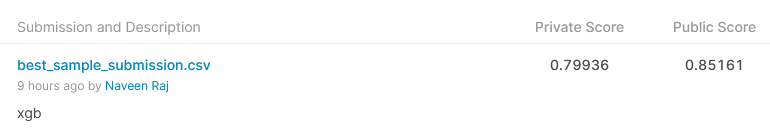

In [1]:

from IPython import display
display.Image(r"C:\Users\Sunayana chittari\project\submissions\xgb\capture1.png")